<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
#Se limpian datos
#desplazamiento
despla=df['desplazamiento'].mean()
df.loc[df['desplazamiento'].isnull(),'desplazamiento'] = despla
cilind=df['cilindros'].mean()
df.loc[df['cilindros'].isnull(),'cilindros'] = cilind
df.loc[df['traccion_tipo']=='dos','traccion_tipo']=2.0
df.loc[df['traccion_tipo']=='cuatro','traccion_tipo']=4.0
df.loc[df['tamano_motor_tipo'].isnull(),'traccion_tipo']=0

In [4]:
#Se crean conjuntos
new = pd.DataFrame()
new['year']=df['year']
new['desplazamiento']=df['desplazamiento']
new['cilindros']=df['cilindros']
new['co2']=df['co2']
new['consumo_litros_milla']=df['consumo_litros_milla']

In [5]:
#minmaxscaler
scaler = MinMaxScaler()
columns = [ 'desplazamiento','co2','consumo_litros_milla']
new[columns] =scaler.fit_transform(new[columns])

new.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,0.243590,4.0,0.398014,0.331027
1,1984,0.461538,6.0,0.527672,0.475113
2,1985,0.243590,4.0,0.424351,0.360294
3,1985,0.461538,6.0,0.527672,0.475113
4,1987,0.410256,6.0,0.424351,0.360294


In [6]:
#Conjunto categórico
cat=pd.DataFrame()
cat['traccion_tipo']=df['traccion_tipo']
cat['clase_tipo']=df['clase_tipo']
cat['transmision_tipo']=df['transmision_tipo']
cat['cambustible_tipo']=df['combustible_tipo']
cat['tamano_motor_tipo']=df['tamano_motor_tipo']
cat['consumo_tipo']=df['consumo_tipo']
cat['co2_tipo']=df['co2_tipo']

In [7]:
#Se crea procesado
df_procesado = pd.merge(new, cat, on=df.index)
df_procesado.head()

,key_0,year,desplazamiento,cilindros,co2,consumo_litros_milla,traccion_tipo,clase_tipo,transmision_tipo,cambustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,0,1984,0.243590,4.0,0.398014,0.331027,2,Vehículos Especiales,Automatica,Normal,pequeño,alto,alto
1,1,1984,0.461538,6.0,0.527672,0.475113,2,Vehículos Especiales,Automatica,Normal,grande,muy alto,muy alto
2,2,1985,0.243590,4.0,0.424351,0.360294,2,Vehículos Especiales,Automatica,Normal,pequeño,alto,alto
3,3,1985,0.461538,6.0,0.527672,0.475113,2,Vehículos Especiales,Automatica,Normal,grande,muy alto,muy alto
4,4,1987,0.410256,6.0,0.424351,0.360294,2,Coches Medianos,Automatica,Premium,grande,alto,alto


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

Nota:
El trabajo fue hecho en base a las columnas de consumo de litros por milla y desplazamiento, replicando lo visto en clases.

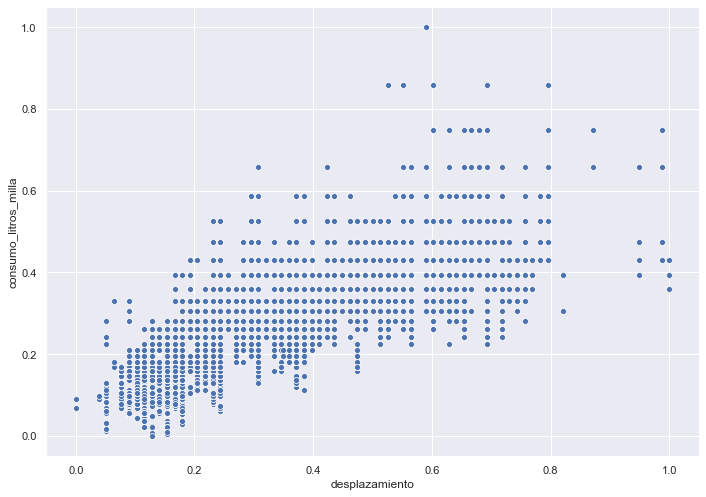

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot( data=df,x=df_procesado['desplazamiento'], y=df_procesado['consumo_litros_milla'])

In [9]:
#se ajusta el modelo kmeans
X=np.array(df_procesado[["desplazamiento","consumo_litros_milla"]])
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
#Se calculan los centroides y los clusters
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters



In [10]:
#funcion moda
def moda(datos):
    repeticiones = 0

    for i in datos:
        n = datos.count(i)
        if n > repeticiones:
            repeticiones = n

    moda = [] #Arreglo donde se guardara el o los valores de mayor frecuencia 

    for i in datos:
        n = datos.count(i) # Devuelve el número de veces que x aparece enla lista.
        if n == repeticiones and i not in moda:
            moda.append(i)

    if len(moda) != len(datos):
        print ('Moda: ', moda)
    else:
        print ('No hay moda')

In [11]:
df_procesado['cluster']=clusters
desp1=[]
desp2=[]
desp3=[]
desp4=[]
desp5=[]
desp6=[]
desp7=[]
desp8=[]
lista1=[]
lista2=[]
lista3=[]
lista4=[]
lista5=[]
lista6=[]
lista7=[]
lista8=[]
for i in range(len(df_procesado)):
    if df_procesado['cluster'][i]==0:
        desp1.append(df['desplazamiento'][i])
        lista1.append(df['consumo_litros_milla'][i])
    if df_procesado['cluster'][i]==1:
        desp2.append(df['desplazamiento'][i])
        lista2.append(df['consumo_litros_milla'][i])
    if df_procesado['cluster'][i]==2:
        desp3.append(df['desplazamiento'][i])
        lista3.append(df['consumo_litros_milla'][i])
    if df_procesado['cluster'][i]==3:
        desp4.append(df['desplazamiento'][i])
        lista4.append(df['consumo_litros_milla'][i])
    if df_procesado['cluster'][i]==4:
        desp5.append(df['desplazamiento'][i])
        lista5.append(df['consumo_litros_milla'][i])
    if df_procesado['cluster'][i]==5:
        desp6.append(df['desplazamiento'][i])
        lista6.append(df['consumo_litros_milla'][i])
    if df_procesado['cluster'][i]==6:
        desp7.append(df['desplazamiento'][i])
        lista7.append(df['consumo_litros_milla'][i])
    if df_procesado['cluster'][i]==7:
        desp8.append(df['desplazamiento'][i])
        lista8.append(df['consumo_litros_milla'][i])

In [12]:
#Cluster 0
print('Promedio y moda cluster 0\n')
print('desplazamiento')
print('promedio=',sum(desp1)/len(desp1),moda(desp1),'\n')
print('consumo_litros_milla')
print('promedio=',sum(lista1)/len(lista1),moda(desp1),'\n')
#Cluster 1
print('Promedio y moda cluster 1\n')
print('desplazamiento')
print('promedio=',sum(desp2)/len(desp2),moda(desp2),'\n')
print('consumo_litros_milla')
print('promedio=',sum(lista2)/len(lista2),moda(desp2),'\n')
#Cluster 2
print('Promedio y moda cluster 2\n')
print('desplazamiento')
print('promedio=',sum(desp3)/len(desp3),moda(desp3),'\n')
print('consumo_litros_milla')
print('promedio=',sum(lista3)/len(lista3),moda(desp3),'\n')
#cluster 3
print('Promedio y moda cluster 3\n')
print('desplazamiento')
print('promedio=',sum(desp4)/len(desp4),moda(desp4),'\n')
print('consumo_litros_milla')
print('promedio=',sum(lista4)/len(lista4),moda(desp4),'\n')
#Cluster 4
print('Promedio y moda cluster 4\n')
print('desplazamiento')
print('promedio=',sum(desp5)/len(desp5),moda(desp5),'\n')
print('consumo_litros_milla')
print('promedio=',sum(lista5)/len(lista5),moda(desp5),'\n')
#cluster 5
print('Promedio y moda cluster 5\n')
print('desplazamiento')
print('promedio=',sum(desp6)/len(desp6),moda(desp6),'\n')
print('consumo_litros_milla')
print('promedio=',sum(lista5)/len(lista5),moda(desp5),'\n')
#cluster 6
print('Promedio y moda cluster 6\n')
print('desplazamiento')
print('promedio=',sum(desp7)/len(desp7),moda(desp7),'\n')
print('consumo_litros_milla')
print('promedio=',sum(lista7)/len(lista7),moda(desp7),'\n')
#Cluster 7
print('Promedio y moda cluster 7\n')
print('desplazamiento')
print('promedio=',sum(desp8)/len(desp8),moda(desp8),'\n')
print('consumo_litros_milla')
print('promedio=',sum(lista8)/len(lista8),moda(desp8),'\n')

Promedio y moda cluster 0

desplazamiento
Moda:  [3.5]
promedio= 3.490645439189819 None 

consumo_litros_milla
Moda:  [3.5]
promedio= 0.1864488931527119 None 

Promedio y moda cluster 1

desplazamiento
Moda:  [6.2]
promedio= 6.0043835616438805 None 

consumo_litros_milla
Moda:  [6.2]
promedio= 0.22865813831833873 None 

Promedio y moda cluster 2

desplazamiento
Moda:  [3.0]
promedio= 2.8061461794019977 None 

consumo_litros_milla
Moda:  [3.0]
promedio= 0.20575646970204609 None 

Promedio y moda cluster 3

desplazamiento
Moda:  [5.0]
promedio= 5.077854055428352 None 

consumo_litros_milla
Moda:  [5.0]
promedio= 0.2572770356697892 None 

Promedio y moda cluster 4

desplazamiento
Moda:  [2.0]
promedio= 2.1939660154894938 None 

consumo_litros_milla
Moda:  [2.0]
promedio= 0.17005952850462294 None 

Promedio y moda cluster 5

desplazamiento
Moda:  [4.3]
promedio= 4.1072639225180865 None 

consumo_litros_milla
Moda:  [2.0]
promedio= 0.17005952850462294 None 

Promedio y moda cluster 6

despl

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [14]:
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,196.835524
1,10,105.204529
2,20,55.865313
3,30,36.604070
4,50,21.770038


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

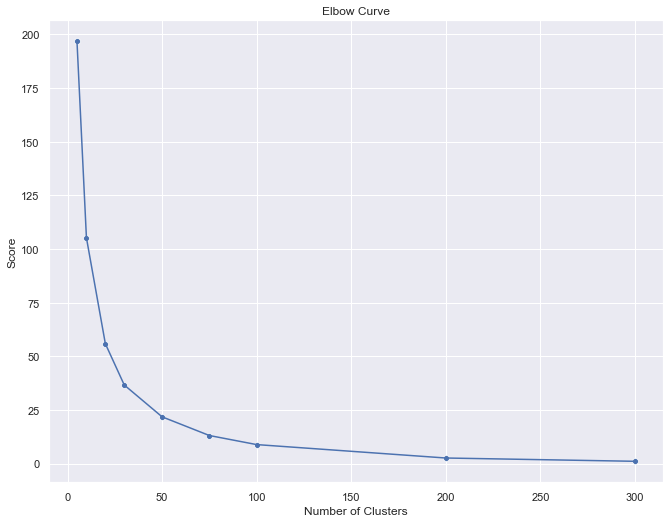

In [15]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

Notemos que la curva comienza a hacerce "suave" en el punto 50, lo cual indica que para este caso el numero de clusters optimo sería 50.